In [65]:
import pandas as pd

# Load the dataset
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,Ma_nhan_vien,So_gio_lam_viec,So_san_pham_duoc_giao,So_san_pham_hoan_thanh,Nang_suat,So_nam_kinh_nghiem,Thuong,Thuong_1,Dieu_kien_lam_viec
0,1,8,10,8,80.00,5,4000,NaN,Good
1,2,7,9,7,77.78,3,3500,NaN,Average
2,3,6,8,6,75.00,2,3000,NaN,Poor
3,4,8,11,10,90.91,4,3800,NaN,Good
4,5,7,9,7,77.78,3,3500,NaN,Average


Index(['Ma_nhan_vien', 'So_gio_lam_viec', 'So_san_pham_duoc_giao',
       'So_san_pham_hoan_thanh', 'Nang_suat', 'So_nam_kinh_nghiem', 'Thuong',
       'Thuong_1', 'Dieu_kien_lam_viec'],
      dtype='object')


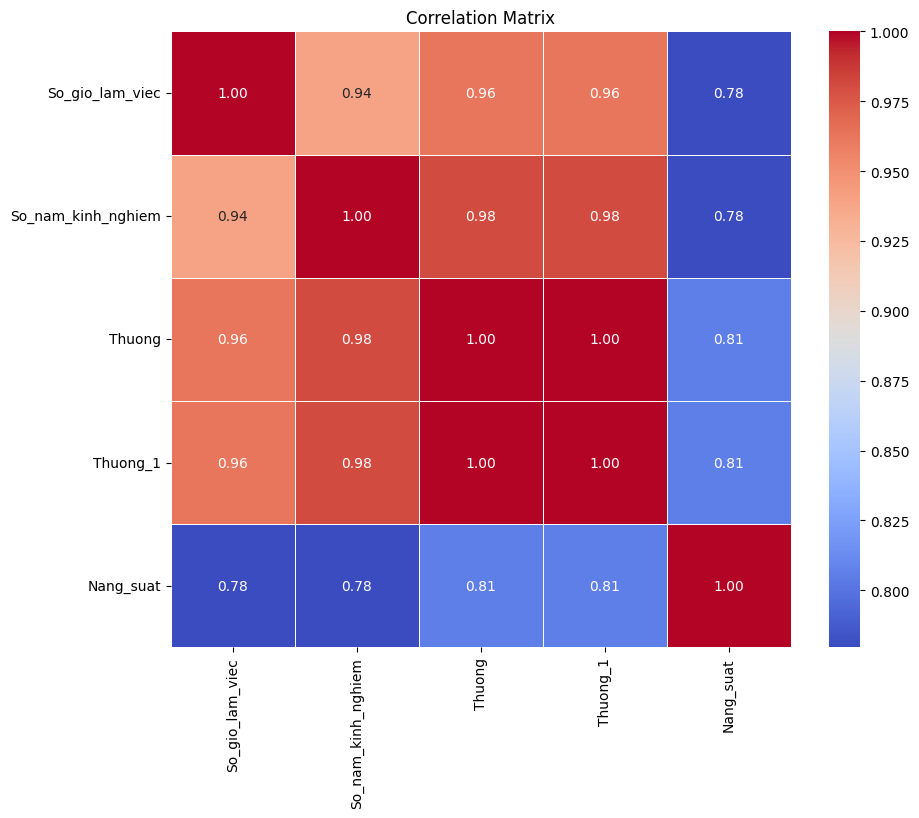

In [71]:

# Renaming the columns based on the context you provided earlier
df = df.rename(columns={
    'Work Hours': 'So_gio_lam_viec',
    'Experience (Years)': 'So_nam_kinh_nghiem',
    'Compensation ($)': 'Thuong',
    'Productivity (%)': 'Nang_suat'
})

# Chuẩn hoá cột thưởng
scaler = MinMaxScaler()
df['Thuong_1'] = scaler.fit_transform(df[['Thuong']])

# Tính toán ma trận 
correlation_matrix = df[['So_gio_lam_viec', 'So_nam_kinh_nghiem', 'Thuong', 'Thuong_1', 'Nang_suat']].corr()

# Trực quan hoá dữ liệu 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Load the dataset
file_path = 'data.xlsx'
data = pd.read_excel(file_path)

# Normalize the Thuong column
scaler = MinMaxScaler()
data['Thuong_1'] = scaler.fit_transform(data[['Thuong']])


# Define features and target variable
X = data[['So_gio_lam_viec', 'So_nam_kinh_nghiem', 'Thuong_1']]
y = data['Nang_suat']

# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

# Dự báo
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

# hệ số
coefficients = model.coef_
intercept = model.intercept_

# Tạo dataframe
features = ['So_gio_lam_viec', 'So_nam_kinh_nghiem', 'Thuong_1']
coeff_df = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

# Print the intercept, coefficients, MSE, and R²
print(f"Intercept: {intercept:.2f}\n")
print(f"\nMean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

abs(coeff_df)

Mean Squared Error: 17.244
R-squared: 0.655
Intercept: 57.17


Mean Squared Error: 17.244
R-squared: 0.655


,Coefficient
So_gio_lam_viec,3.034265
So_nam_kinh_nghiem,0.411888
Thuong_1,8.473656


In [67]:
data.head()

,Ma_nhan_vien,So_gio_lam_viec,So_san_pham_duoc_giao,So_san_pham_hoan_thanh,Nang_suat,So_nam_kinh_nghiem,Thuong,Thuong_1,Dieu_kien_lam_viec
0,1,8,10,8,80.00,5,4000,1.0,Good
1,2,7,9,7,77.78,3,3500,0.5,Average
2,3,6,8,6,75.00,2,3000,0.0,Poor
3,4,8,11,10,90.91,4,3800,0.8,Good
4,5,7,9,7,77.78,3,3500,0.5,Average


In [68]:

# Code lấy các hệ số hồi quy 
coefficients = model.coef_
intercept = model.intercept_

# Tạo Dataframe để thực hiện hiển thị
features = ['So_gio_lam_viec',  'So_nam_kinh_nghiem', 'Thuong']
coeff_df = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

# In ra các metric đánh giá
print(f"Intercept: {intercept:.2f}\n")
print(f"\nMean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

Intercept: 57.17


Mean Squared Error: 17.244
R-squared: 0.655


,Coefficient
So_gio_lam_viec,3.034265
So_nam_kinh_nghiem,0.411888
Thuong,8.473656
